# Problem 2

In [1]:
# import data
import pandas as pd
df=pd.read_csv('C:/Onedrive/OneDrive - Knights - University of Central Florida/UCF/Courses/Smart City/HW1/Bike-Sharing-Dataset/hour.csv')

In [26]:
# Select the required dataset
import numpy as np
# create design matrix X and target vector y
X = np.array(df.iloc[:, [2,4,5,6,7,8,9,10,11,12,13]]) 	# end index is exclusive
Y = np.array(df['cnt']) 	# another way of indexing a pandas df

In [39]:
print(X)

[[  1.       1.       0.     ...,   0.2879   0.81     0.    ]
 [  1.       1.       1.     ...,   0.2727   0.8      0.    ]
 [  1.       1.       2.     ...,   0.2727   0.8      0.    ]
 ..., 
 [  1.      12.      21.     ...,   0.2576   0.6      0.1642]
 [  1.      12.      22.     ...,   0.2727   0.56     0.1343]
 [  1.      12.      23.     ...,   0.2727   0.65     0.1343]]


In [27]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [28]:
# Scale the datasets
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  

In [50]:
# ANN with lbfgs solver
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), max_iter=20000, random_state=1)
y_pred = clf.fit(X_train, Y_train).predict(X_test)
score_tst = clf.score(X_test,Y_test)
print(score_tst)

0.858626202548


In [30]:
# ANN with sgd solver
clf = MLPRegressor(solver='sgd', alpha=1e-5, hidden_layer_sizes=(100,), max_iter=20000, random_state=1)
y_pred = clf.fit(X_train, Y_train).predict(X_test)
score_tst = clf.score(X_test,Y_test)
print(score_tst)

0.523351988066


In [32]:
# ANN with adam solver
clf = MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,), max_iter=20000, random_state=1)
y_pred = clf.fit(X_train, Y_train).predict(X_test)
score_tst = clf.score(X_test,Y_test)
print(score_tst)

0.735598517912


In [52]:
# Develop model based on different hidden layer
score_list=[]
for i in range (1,5):
    clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(np.repeat(100,i)), max_iter=20000, random_state=1)
    y_pred = clf.fit(X_train, Y_train).predict(X_test)
    score_tst = clf.score(X_test,Y_test)
    score_list.append(score_tst)
    

In [53]:
print(score_list)

[0.85862620254837618, 0.78296701882675002, 0.77110685250856426, 0.74043152245553445]


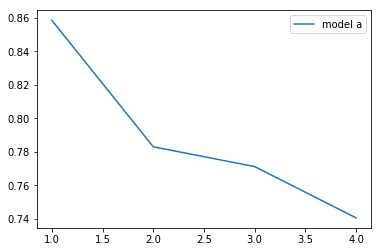

In [58]:
# Plot the accuracy level for different kernel function
import matplotlib.pyplot as plt
%matplotlib inline

x=np.array([1,2,3,4])

plt.plot(x,score_list, label='model a')

plt.legend()
plt.show()

# b: ANN model to predict the bikesharing demand for the next hour

In [40]:
# remove the last row of X and first obs of Y
X1 = X[:-1] 	# end index is exclusive
Y1 = Y[1:] 	# another way of indexing a pandas df

In [41]:
print(X1)

[[  1.       1.       0.     ...,   0.2879   0.81     0.    ]
 [  1.       1.       1.     ...,   0.2727   0.8      0.    ]
 [  1.       1.       2.     ...,   0.2727   0.8      0.    ]
 ..., 
 [  1.      12.      20.     ...,   0.2576   0.6      0.1642]
 [  1.      12.      21.     ...,   0.2576   0.6      0.1642]
 [  1.      12.      22.     ...,   0.2727   0.56     0.1343]]


In [42]:
# split into train and test
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

In [43]:
# Scale the datasets
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X1_train)  
X1_train = scaler.transform(X1_train)  
# apply same transformation to test data
X1_test = scaler.transform(X1_test)  

In [54]:
# Develop model based on different hidden layer
b_score_list=[]
for i in range (1,5):
    clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(np.repeat(100,i)), random_state=1, max_iter=200000)
    y_pred = clf.fit(X1_train, Y1_train).predict(X1_test)
    score_tst = clf.score(X1_test,Y1_test)
    b_score_list.append(score_tst)
print(b_score_list)

[0.855158714545313, 0.79831935817823396, 0.74610765072156282, 0.70569733351496766]


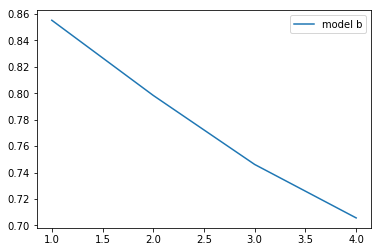

In [57]:
# Plot the accuracy level for different kernel function
import matplotlib.pyplot as plt
%matplotlib inline

x=np.array([1,2,3,4])

plt.plot(x,b_score_list, label='model b')

plt.legend()
plt.show()

# c: Compare the accuracy of the ANN models developed

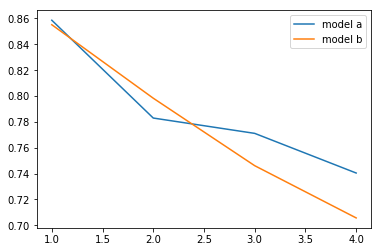

In [56]:
# Plot the accuracy level for different kernel function
import matplotlib.pyplot as plt
%matplotlib inline

x=np.array([1,2,3,4])

plt.plot(x,score_list, label='model a')
plt.plot(x,b_score_list, label='model b')

plt.legend()
plt.show()